# import package
[plot tile](https://github.com/ECCO-GROUP/ECCO-v4-Python-Tutorial/blob/master/Tutorials_as_Jupyter_Notebooks/ECCO_v4_Plotting_Tiles.ipynb)


[link 2_ECCOv4 Loading llc binary files in the ‘compact’ format](https://ecco-v4-python-tutorial.readthedocs.io/ECCO_v4_Loading_LLC_compact_binary_files.html)

[link 3](https://github.com/ChanJeunlam/ECCO-v4-Python-Tutorial/blob/master/Tutorials_as_Jupyter_Notebooks/ECCO_v4_Loading_the_ECCOv4_state_estimate_fields_on_the_native_model_grid.ipynb)

In [1]:
import numpy as np
import sys
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# load some useful cartopy routines
from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# and a new matplotlib routine 
import matplotlib.path as mpath

## import package to plot ECCO

A Python library with routines that support the loading, analysis, and plotting fields of the ECCO Version 4 Ocean and Sea-Ice State Estimate. The ecco_v4_py library builds on several valuable tools such as xmitgcm, gcm, xarray, and dask.

[LIBRARY](https://github.com/ECCO-GROUP/ECCOv4-py)

In [2]:
sys.path.append('F:\\OneDrive - HKUST Connect\\working file\\ECCO Version 4\\ECCOv4-py\\ECCOv4-py')
import ecco_v4_py as ecco

In [14]:
help(ecco.read_llc_to_tiles)

Help on function read_llc_to_tiles in module ecco_v4_py.read_bin_llc:

read_llc_to_tiles(fdir, fname, llc=90, skip=0, nk=1, nl=1, filetype='>f', less_output=False, use_xmitgcm=False)
    Loads an MITgcm binary file in the 'tiled' format of the
    lat-lon-cap (LLC) grids with dimension order:
    
        [N_recs, N_z, N_tiles, llc, llc]
    
    where if either N_z or N_recs =1, then that dimension is collapsed
    and not present in the returned array.
    
    if use_xmitgcm == True
    
        data are read in via the low level routine
        xmitgcm.utils.read_3d_llc_data and returned as dask array.
    
        Hint: use data_tiles.compute() to load into memory.
    
    if use_xmitgcm == False
    
        Loads an MITgcm binary file in the 'compact' format of the
        lat-lon-cap (LLC) grids and converts it to the '13 tiles' format
        of the LLC grids.
    
    Parameters
    ----------
    fdir : string
        A string with the directory of the binary file to open
 

In [16]:
help(ecco.load_ecco_var_from_years_nc)

Help on function load_ecco_var_from_years_nc in module ecco_v4_py.tile_io:

load_ecco_var_from_years_nc(data_dir, var_to_load, years_to_load='all', tiles_to_load='all', k_subset=[], dask_chunk=True, less_output=True)
    Loads one or more ECCOv4 NetCDF state estimate variable in the
    format of one file per variable per year.  All 13 tiles of the
    lat-lon-cap (llc) grid are present in this type of file.
    
    Files in this format have names like
        /eccov4r3_native_grid_netcdf/mon_mean/THETA/THETA_2010.nc
        /eccov4r3_native_grid_netcdf/day_mean/THETA/THETA_2010.nc
        /eccov4r3_native_grid_netcdf/mon_snapshot/THETA/THETA_2010.nc
    
    Simply point this routine at a directory with one or more
    of these files and one or more years of var_to_load variables will
    be loaded.
    * Used repeatedly by recursive_load_ecco_var_from_years_nc *
    
    
    Parameters
    ----------
    data_dir : str
        path to a directory within which we will look for NetCD

the grid information could be found here:
https://web.corral.tacc.utexas.edu/OceanProjects/ECCO/ECCOv4/Release3_alt/nctiles_grid/

In [9]:
base_dir = 'F:/OneDrive - HKUST Connect/working file/test_ECCO_plot'
ECCO_dir = base_dir + '/Release3_alt'
# Load the model grid
grid_dir = ECCO_dir + '/nctiles_grid/'

ecco_grid = ecco.load_ecco_grid_nc(grid_dir,'ECCOv4r3_grid.nc')
ecco_grid
ecco_grid.hFacC

<xarray.DataArray 'hFacC' (k: 50, tile: 13, j: 90, i: 90)>
array([[[[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [1.        , 1.        , 1.        , ..., 1.        ,
          1.        , 1.        ],
         [1.        , 1.        , 1.        , ..., 1.        ,
          1.        , 1.        ],
         [1.        , 1.        , 1.        , ..., 1.        ,
          1.        , 1.        ]],

        [[1.        , 1.        , 1.        , ..., 1.        ,
          1.        , 1.        ],
         [1.        , 1.        , 1.        , ..., 1.        ,
          1.        , 1.        ],
         [1.        , 1.        , 1.        , ..., 1.        ,
          1.        , 1.        ],
...
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]],

        [[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]]]], dtype=float32)
Coordinates:
  * i          (i) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j          (j) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k          (k) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * tile       (tile) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    XC         (tile, j, i) float32 -111.6 -111.3 -110.9 ... -105.6 -111.9
    YC         (tile, j, i) float32 -88.24 -88.38 -88.52 ... -88.03 -88.08 -88.1
    CS         (tile, j, i) float32 0.06158 0.06675 0.07293 ... -0.9854 -0.9984
    SN         (tile, j, i) float32 -0.9981 -0.9978 -0.9973 ... -0.1705 -0.05718
    Z          (k) float32 -5.0 -15.0 -25.0 ... -5.039e+03 -5.461e+03 -5.906e+03
    rA         (tile, j, i) float32 3.623e+08 3.633e+08 ... 3.685e+08 3.611e+08
    Depth      (tile, j, i) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    drF        (k) float32 10.0 10.0 10.0 10.0 10.0 ... 387.5 410.5 433.5 456.5
    PHrefC     (k) float32 49.05 147.1 245.2 ... 4.944e+04 5.357e+04 5.794e+04
    hFacC      (k, tile, j, i) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    maskC      (k, tile, j, i) bool False False False ... False False False
    maskCtrlC  (k, tile, j, i) bool False False False ... False False False
Attributes:
    standard_name:  cell_vertical_fraction
    long_name:      vertical fraction of open cell

In [7]:
dataset = xr.open_dataset(base_dir + '/OCEAN_3D_MIXING_COEFFS_ECCO_V4r4_native_llc0090.nc')
dataset.KAPGM

<xarray.DataArray 'KAPGM' (k: 50, tile: 13, j: 90, i: 90)>
[5265000 values with dtype=float32]
Coordinates:
  * i        (i) int32 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * j        (j) int32 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * k        (k) int32 0 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48 49
  * tile     (tile) int32 0 1 2 3 4 5 6 7 8 9 10 11 12
    XC       (tile, j, i) float32 ...
    YC       (tile, j, i) float32 ...
    Z        (k) float32 ...
Attributes:
    coverage_content_type:  modelResult
    long_name:              Gent-McWilliams diffusivity
    units:                  m2 s-1
    comment:                Gent-McWilliams diffusivity coefficient as descri...
    valid_min:              100.0
    valid_max:              10000.0

-179.875 179.875
-180.0 180.0
-89.875 89.875
-90.0 90.0


Text(0.5, 1.0, 'SURFACE_KAPGM(m^2*s^-1)')

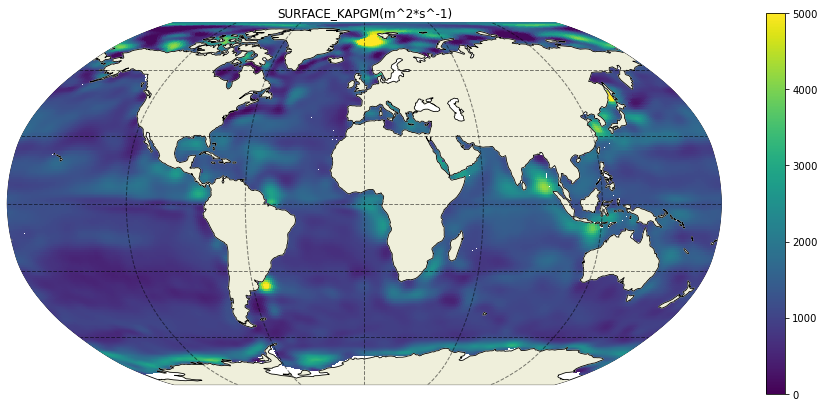

In [14]:
# plot the SURFACE
SURFACE_KAPGM  = dataset.KAPGM.isel(k=1)
# mask to nan where hFacC(k=0) = 0
SURFACE_KAPGM = SURFACE_KAPGM.where(ecco_grid.hFacC.isel(k=0))

fig  = plt.figure(figsize=(16,7))
ecco.plot_proj_to_latlon_grid(ecco_grid.XC, ecco_grid.YC, SURFACE_KAPGM, show_colorbar=True, cmin=0, cmax=5000);plt.title('SURFACE_KAPGM(m^2*s^-1)')

